<a href="https://colab.research.google.com/github/lindseyhuppin/Neur265Work/blob/main/notebooks/Cell_Types_01_31_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Looking at cell types!

Here, we have some data from the Allen Brain Institute (alleninstitute.org)

The Allen Brain Institute curates large datasets containing information about many different brain attributes

These datasets can be accessed at <i><u>portal.brain-map.org</i></u>

<b>Task:</b> Go the the ABI data portal and click on the tab that says "explore mouse patch-seq data". Click on the *down* arrow next to "Mouse PatchSeq VIS | Specimens", and click on "Summary". Create a new *Markdown Cell* below and type, in your own words, what you think the advantage of Patch-seq is after reading the project description.


## Edit this cell!

### Purpose of the experiments
They conducted the experiment to be able to identify different characteristics of neurons using patch-seq specifically the electrophysiological, morphological, and transcriptomic characteristics.

### Benefit of patch-seq
Patch-seq is a variation of the patch-clamp system that can be used to help identify neuron characteristics. It can be used for different brain regions and different species, so it is very generalizable as well. It can get transcription data.

Patch - can get resting potential and other electrical signals
Seq - can get a sample of the cell and read all genes it expresses

Now, we're going to load some data from the patch-seq dataset. To do this, we first need to import a package called `pandas`. `Pandas` lets you create objects called `DataFrames` - these objects let you organize your data like you would in an Excel spreadsheet.




In [2]:
# Run this code to install pandas
try:
    import pandas as pd
    print('pandas already installed')
except ImportError as e:
    !pip install pandas

pandas already installed


Now, we're going to import our patch-seq data from the `.csv` file located in our GitHub repository. A `.csv` file works much like an Excel spreadsheet, and is often used by data scientists to organize their data prior to working with it in programming languages like python.

In [4]:
# Before you run this cell, click on the .csv file in your respository, and then click on "View Raw"
# Copy the link to the raw dataset and store it as a string variable called url

url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/data/patch_seq.csv'
cell_types = pd.read_csv(url)

<b>Task:</b> Look at your `cell_types` variable. Create a new *Markdown* cell and answer the following: What are the two headers? What do you think each of them means? Go to the following website: <span style = "color:blue"><u>https://www.ncbi.nlm.nih.gov/gene/</u></span>, and type in the name of the first marker gene you see. Read about this gene and what it does. Repeat this for the second marker gene you see.

In [6]:
# Look at your cell_types variable here
cell_types
# ISI = Inter spike interval

#Sst: Somatostatin - selectively expressed in a specific interneurons in the brain
#Pvalb: Parvalbumin - selectively expressed in a specific interneurons in the brain.
# These are not expressed in the same neurons

,Marker,ISI
0,Sst,77.337143
1,Sst,44.145000
2,Sst,7.840000
3,Sst,73.090000
4,Sst,63.513333
...,...,...
135,Pvalb,10.762273
136,Pvalb,18.110588
137,Pvalb,10.169565
138,Pvalb,12.216667


from matplotlib import pyplot as plt
cell_types['ISI'].plot(kind='hist', bins=20, title='ISI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
cell_types.groupby('Marker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cell_types['ISI'].plot(kind='line', figsize=(8, 4), title='ISI')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cell_types['Marker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cell_types, x='ISI', y='Marker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

It might be interesting to compare ISIs between the two cell types in your dataset. Recall from our lecture that ISIs are often viewed as a histogram - a type of graph that plots the number of observations for each value (or "binned" value)

<img src = 'https://drive.google.com/uc?id=1vAoypW_RQ-BzwUgsZH8nHKPds9AoKm9X'>


Let's do this with our data. First, we need to make sure we have the `matplotlib` package installed, which will let us create the histograms

In [7]:
# Run this code to install matplotlib
try:
    import matplotlib
    print('matplotlib already installed')
except ImportError as e:
    !pip install matplotlib

matplotlib already installed


Now, run the *Code* cell below to create two histograms - one for *Pvalb* neurons and one for *Sst* neurons

array([<Axes: title={'center': 'Pvalb'}>, <Axes: title={'center': 'Sst'}>],
      dtype=object)

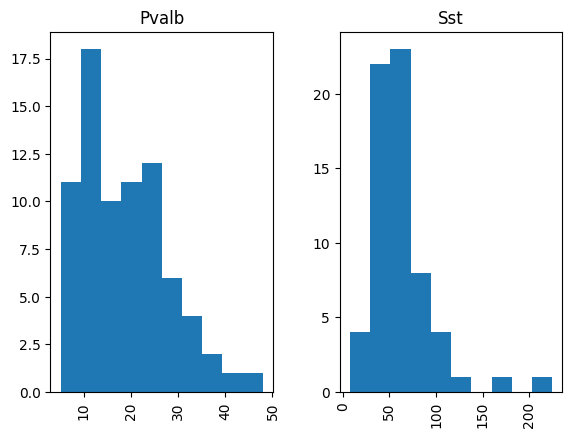

In [8]:
# Let's make some histograms!

cell_types['ISI'].hist(by = cell_types['Marker'])


<b>Task:</b> Answer the following in a *Markdown Cell* below: What do you notice about your two histograms? Do they look different? Take note of the axes - what do you think is represented on the x-axis? What is represented on the y-axis? Are the x-axis values the same between the two histograms?

## Edit this cell!

* They have different scales on the x axis. The Pvalb ranges between 0 and 50 while Sst ranges between 0 and 250.
* The x axis is likely a measure of interspike intervals in ms
* The y axis is likely how many times those values occured (count)
* The sst fires less frequently than pvalb / pvalb fires more often than sst

Let's re-plot our histograms, and make the x-axis ranges the same. Let's also create x-axis and y-axis labels for our plots.

Text(0.5, 0, 'Interspike Interval (ms)')

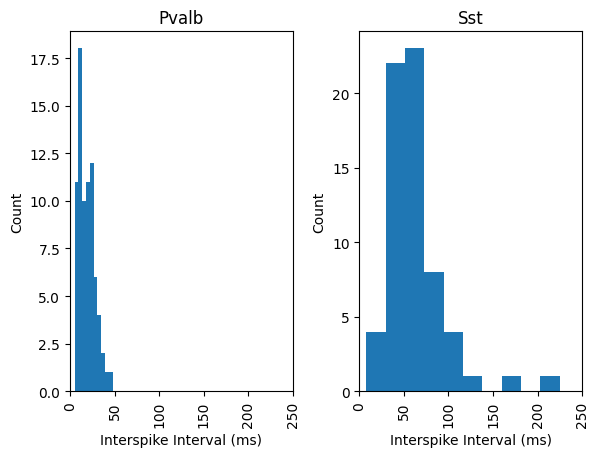

In [17]:
# Let's re-make our histograms!

axes = cell_types['ISI'].hist(by = cell_types['Marker'])

axes[0].set_xlim(0,250)
axes[1].set_xlim(0,250)

# Enter appropriate labels for the x-axis and y-axis of the first histogram inside of the parentheses - remember to use '' when creating a string!

axes[0].set_ylabel('Count')
axes[0].set_xlabel('Interspike Interval (ms)')

# Create code that will do the same thing for your second histogram!
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Interspike Interval (ms)')
